In [1]:
import ttfemesh
help(ttfemesh)

Help on package ttfemesh:

NAME
    ttfemesh

DESCRIPTION
    TTFEMesh is a Python package for finite element methods using tensor train
    decompositions.

    The package implements a framework for creating and manipulating finite element
    meshes in the tensor train format. This provides the backbone for solving partial
    differential equations using TT decompositions. The package is designed
    to be flexible and extensible, allowing users to create their own finite element
    meshes and build their own solvers.

    The package is built on top of the `torchtt` package, which provides a framework
    for handling TT decompositions, but this might change in the future.
    This package is currently in a prototype stage, and the API is subject to change.

    See the documentation for more details.

    Example usage:
        >>> from ttfemesh.domain import RectangleFactory
        >>> from ttfemesh.quadrature import GaussLegendre2D
        >>> from ttfemesh.mesh import Subdom

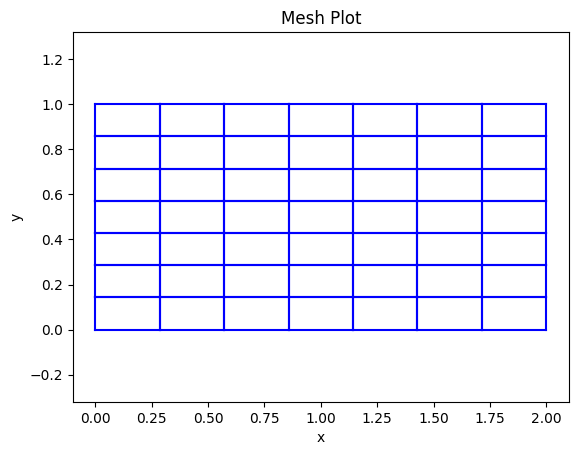

In [2]:
from ttfemesh.domain import RectangleFactory
from ttfemesh.quadrature import GaussLegendre2D
from ttfemesh.mesh import SubdomainMesh2D

lower_left = (0, 0)
upper_right = (2, 1)
rectangle = RectangleFactory.create(lower_left, upper_right)
quadrature_rule = GaussLegendre2D()
mesh_size_exponent = 3
mesh = SubdomainMesh2D(rectangle, quadrature_rule, mesh_size_exponent)

mesh.plot()

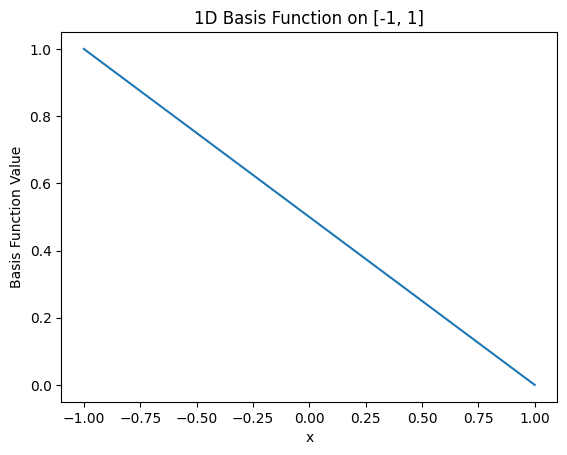

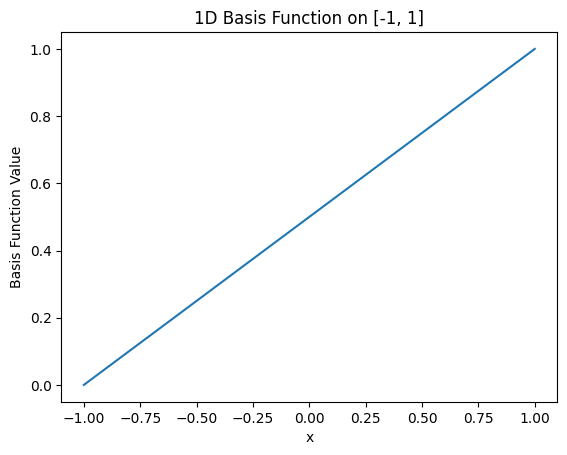

In [3]:
from ttfemesh.basis import LinearBasis 
basis1d = LinearBasis()

fig = basis1d.plot(0)
fig.show()
fig = basis1d.plot(1)
fig.show()

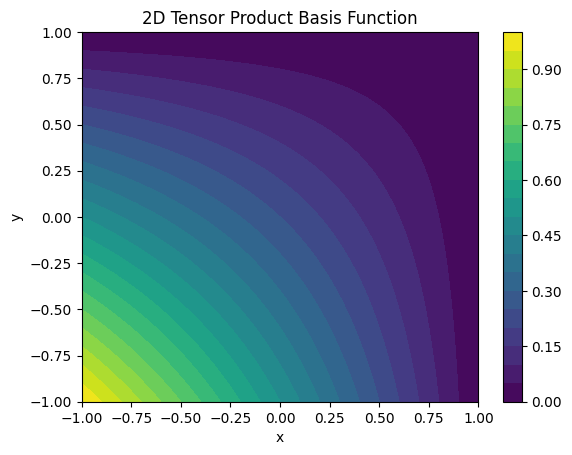

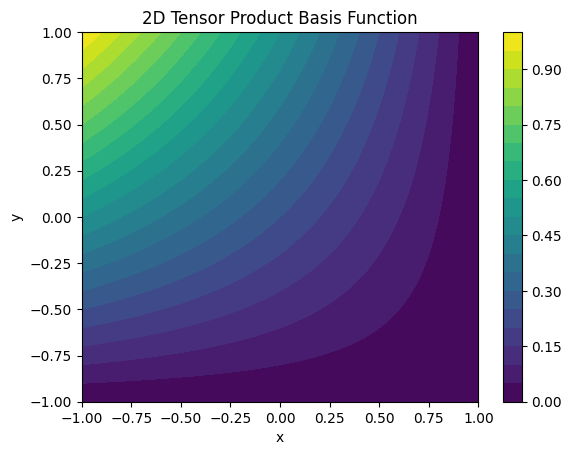

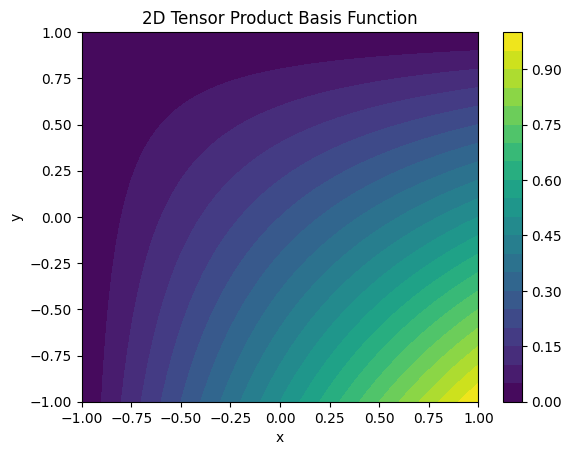

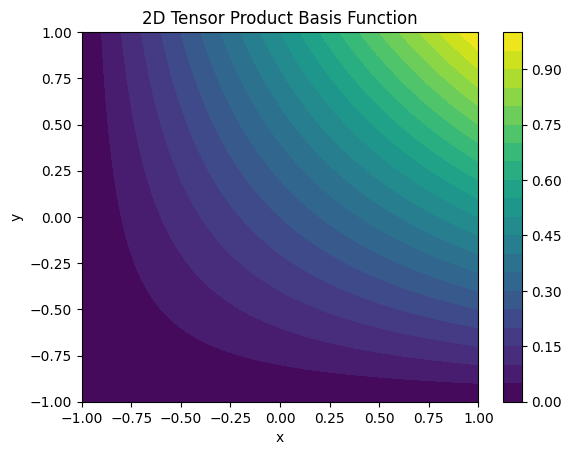

In [4]:
from ttfemesh.basis import BilinearBasis
basis2d = BilinearBasis()

fig = basis2d.plot([0, 0])
fig.show()
fig = basis2d.plot([0, 1])
fig.show()
fig = basis2d.plot([1, 0])
fig.show()
fig = basis2d.plot([1, 1])
fig.show()

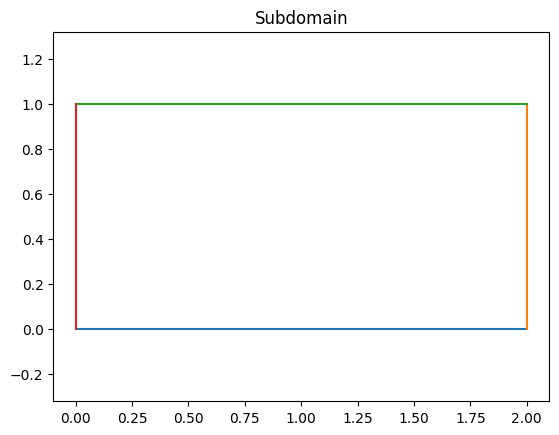

In [5]:
from ttfemesh.domain import RectangleFactory
lower_left = (0, 0)
upper_right = (2, 1)
rectangle = RectangleFactory.create(lower_left, upper_right)
rectangle.plot()

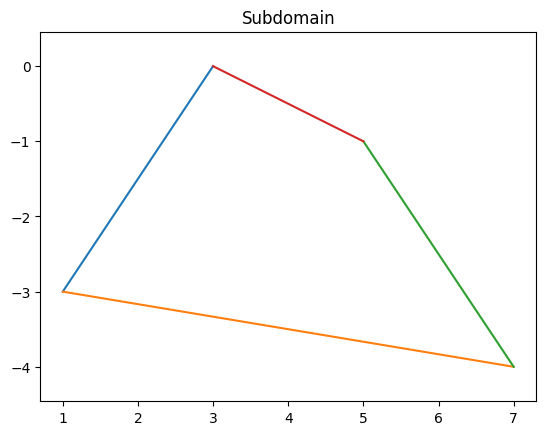

In [6]:
from ttfemesh.domain import QuadFactory
p1 = (3, 0)
p2 = (1, -3)
p3 = (7, -4)
p4 = (5, -1)

quad3 = QuadFactory.create(p1, p2, p3, p4)
quad3.plot()

Line2D(start=(0, 0), end=(1, 1))


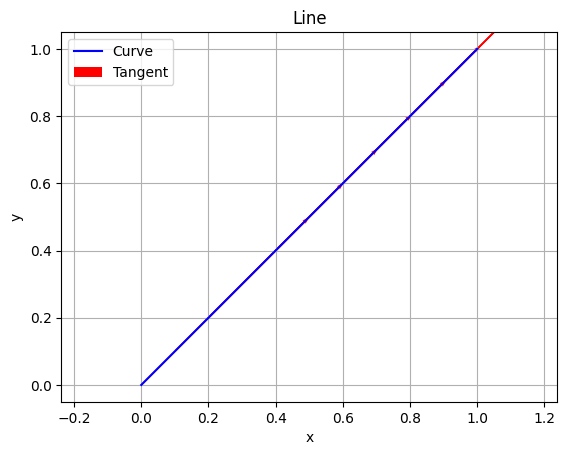

In [7]:
from ttfemesh.domain import Line2D
from ttfemesh.utils import plot_curve_with_tangents
line = Line2D((0, 0), (1, 1))
print(line)
plot_curve_with_tangents(line, "Line")

CircularArc2D(center=(0, 0), radius=1, start_angle=1.5707963267948966, angle_sweep=1.5707963267948966)


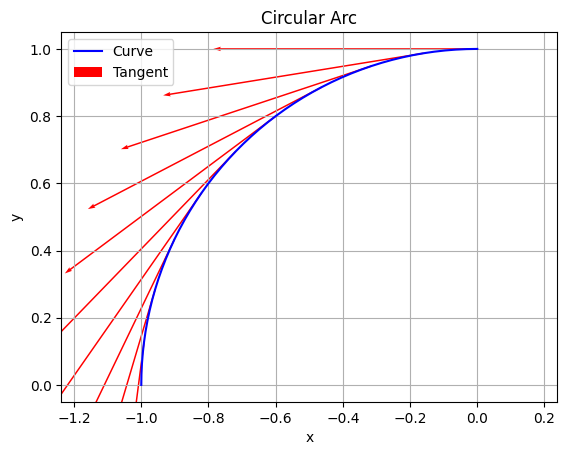

In [8]:
import numpy as np
from ttfemesh.domain import CircularArc2D
from ttfemesh.utils import plot_curve_with_tangents
circular_arc = CircularArc2D((0, 0), 1, np.pi/2., 0.5*np.pi)
print(circular_arc)
plot_curve_with_tangents(circular_arc, "Circular Arc")

ParametricCurve2D(x_func=<function <lambda> at 0xffff0c833b00>, y_func=<function <lambda> at 0xffff0c8339c0>)


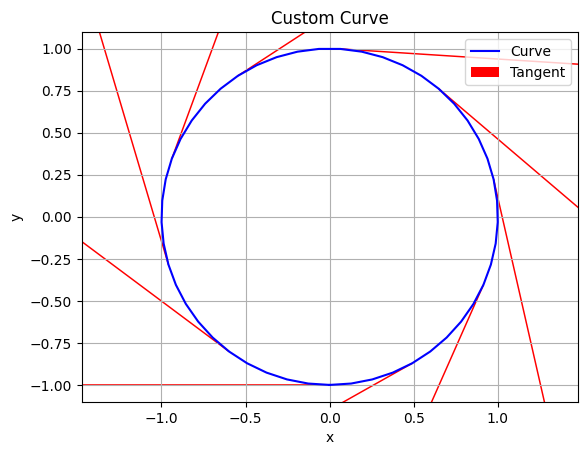

In [9]:
from ttfemesh.domain import ParametricCurve2D
from ttfemesh.utils import plot_curve_with_tangents
custom_curve = ParametricCurve2D(lambda t: np.sin(t * np.pi), lambda t: np.cos(t * np.pi))
print(custom_curve)
plot_curve_with_tangents(custom_curve, "Custom Curve")

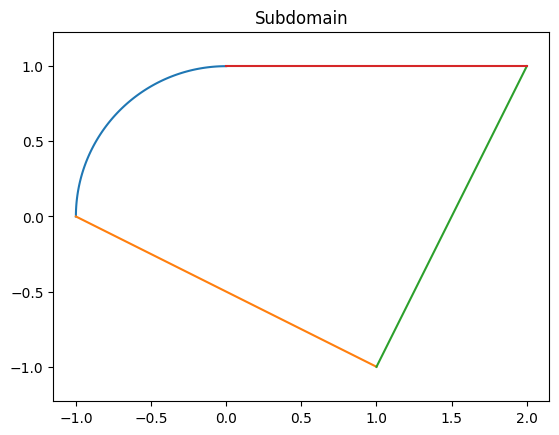

In [2]:
from ttfemesh.domain import CircularArc2D, Line2D
from ttfemesh.domain import Subdomain2D

arc0 = CircularArc2D((0, 0), 1, np.pi/2., 0.5*np.pi)
line1 = Line2D((-1, 0), (1, -1))
line2 = Line2D((1, -1), (2, 1))
line3 = Line2D((2, 1), (0, 1))

subdomain = Subdomain2D([arc0, line1, line2, line3])
subdomain.plot()

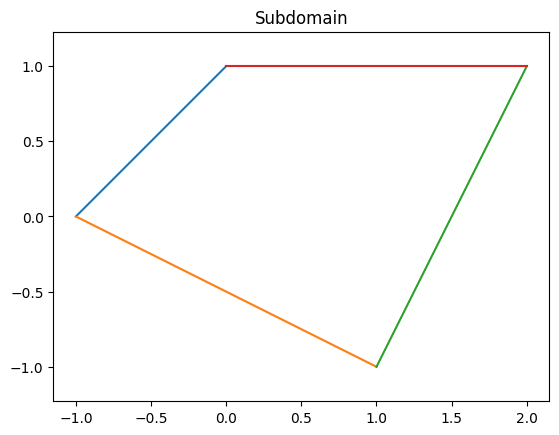

In [3]:
from ttfemesh.domain import Line2D
from ttfemesh.domain import Quad

line0 = Line2D((0, 1), (-1, 0))
line1 = Line2D((-1, 0), (1, -1))
line2 = Line2D((1, -1), (2, 1))
line3 = Line2D((2, 1), (0, 1))

subdomain = Quad([line0, line1, line2, line3])
subdomain.plot()

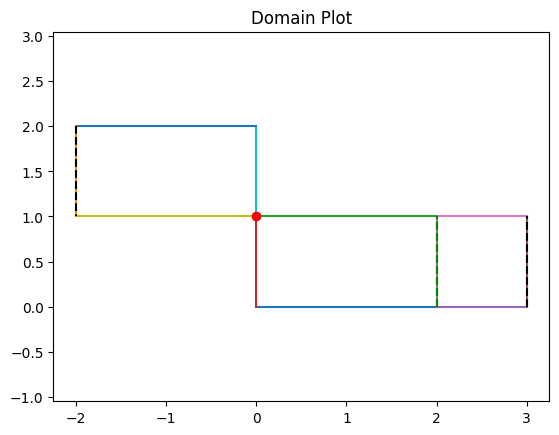

In [9]:
from ttfemesh.domain import RectangleFactory, CurveConnection2D, VertexConnection2D, Domain2D
from ttfemesh.domain import DirichletBoundary2D
lower_left = (0, 0)
upper_right = (2, 1)
rectangle1 = RectangleFactory.create(lower_left, upper_right)

lower_left = (2, 0)
upper_right = (3, 1)
rectangle2 = RectangleFactory.create(lower_left, upper_right)

lower_left = (-2, 1)
upper_right = (0, 2)
rectangle3 = RectangleFactory.create(lower_left, upper_right)

domain_idxs = [0, 1]
curve_idxs = [1, 3]
edge = CurveConnection2D(domain_idxs, curve_idxs)

vertex_idxs = [(0, 3, "start"), (2, 0, "end")]
vertex = VertexConnection2D(vertex_idxs)

bc = DirichletBoundary2D([(1, 1), (2, 3)])

domain = Domain2D([rectangle1, rectangle2, rectangle3], [edge, vertex], bc)
domain.plot()